# SR-Dyna (Novel Revaluation Task)

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib
import matplotlib.animation as manimation

In [19]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/notebooks/sr-dyna-impl/srdyna.py'>

Loaded 10x10 world


//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
//miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


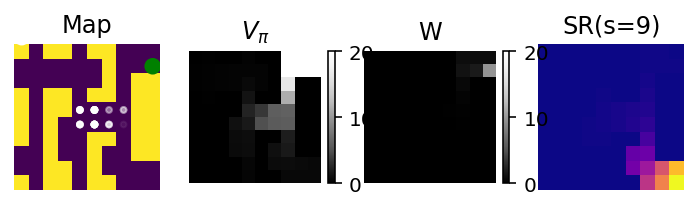

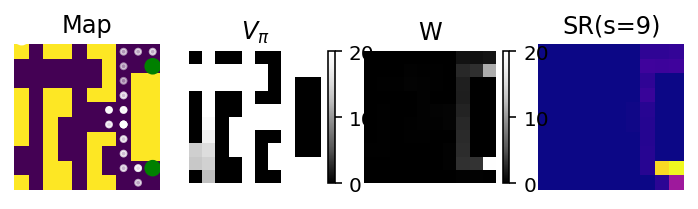

In [20]:
# Latent Learning
REPLAY = "sufficient"
EXPLORE_STEPS = 25000
S1_S2_TRIALS = 20
POST_REWARD_STEPS = 20
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
S1_LOC = (0, 2)
S2_LOC = (8, 1)
env = srdyna.SimpleGridWorld(world='worlds/latent_learning.txt')
agent = srdyna.SRDyna(id=0, loc=(0, 2), env=env)

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Add reward
R1_LOC = (9, 8)
env.reward_locs[R1_LOC] = 10

for i in range(POST_REWARD_STEPS):
    # Repeated one-step runs from R1
    agent.terminate_episode(reset_state=env.state_at_loc(R1_LOC))
    agent.step(verbose=False)

fig, axs = plt.subplots(1, 4, dpi=144)
env.render(agent, ax=axs[0], last_k_steps=30)
agent.render_state_values(ax=axs[1], fig=fig)
agent.render_W(ax=axs[2], fig=fig)
agent.render_sr(9, ax=axs[3])
plt.show()

# Trials from S1 or S2 (until R1 reached)
for i in range(S1_S2_TRIALS):
    s_loc = S1_LOC if i % 2 == 0 else S2_LOC
    agent.terminate_episode(reset_state=env.state_at_loc(s_loc))
    done = False
    steps = 0
    MAX_STEPS = 1000
    while not done and steps < MAX_STEPS:
        done = agent.step(verbose=False)
        steps += 1
        
# Add second reward
R2_LOC = (9, 1)
env.reward_locs[R2_LOC] = 20

# Learn about R2 - repeated one-step runs from R2
for i in range(POST_REWARD_STEPS):
    agent.terminate_episode(reset_state=env.state_at_loc(R2_LOC))
    agent.step(verbose=False)

for i in range(REPLAY_STEPS):
    # One-step replay samples from random sa's
    from_sa = agent.random_experience_sa()
    experiences_from_sa = agent.weighted_experience_samples(k=1, from_sa=from_sa)
    agent.learn_offline(samples=experiences_from_sa)
    
fig, axs = plt.subplots(1, 4, dpi=144)
env.render(agent, ax=axs[0], last_k_steps=30)
agent.render_state_values(ax=axs[1], fig=fig)
agent.render_W(ax=axs[2], fig=fig)
agent.render_sr(9, ax=axs[3])
plt.show()

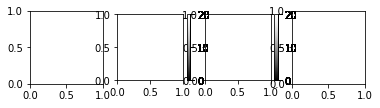

In [21]:
# Generate anim (slow)
agent.record_trials(title="novel_revaluation", 
                    start_locs=[(0, 2), (4, 0), (9, 0), (0, 8)])